In [3]:
import sys
import os
import pandas as pd
import numpy as np
sys.path.insert(0, r'D:\uni\Masterarbeit\Code\auswertung')
import auswertung_ma
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import special
# from auswertung_ma import f_exp, f_poly, f_poly_long

Hier will ich die Auswertung fuer die Variation von c nochmal ausführlich machen

In [4]:
# lese die vorausgewerteten Daten ein
p = r'D:\Uni\Masterarbeit\Daten\Anteil\5_scenarios\Vorauswertung'
data_vor, lp_vor = auswertung_ma.read_vorauswertung(p, id='c', id_stelle=1, read_lp=True)

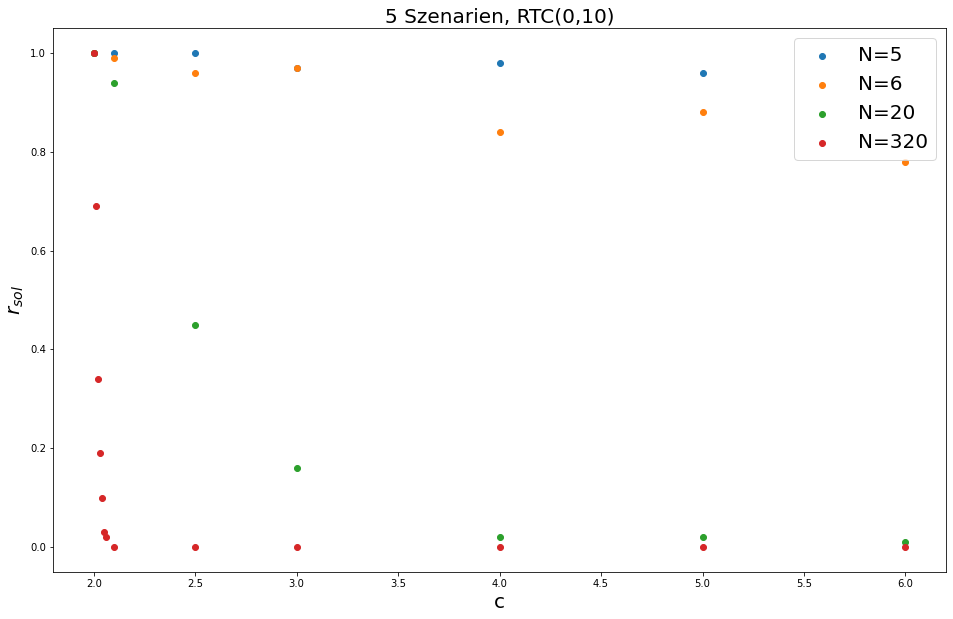

In [9]:
fig, ax = plt.subplots(figsize=(16,10))

for n in sorted(lp_vor.keys()):

    ax.scatter(lp_vor[n].index, lp_vor[n]['Anteil_GGL'], label=f'N={n}')

ax.set_xlabel('c', fontsize=20)
ax.set_ylabel('$r_{sol}$', fontsize=20)
ax.set_title('5 Szenarien, RTC(0,10)', fontsize=20)
ax.legend(fontsize=20)

Algorithmus Performance Vergleich

[] [320]


Text(0, 0.5, 'Anteil aller Problemstellungen bei denen LP_Approx Schranke4b erreicht')

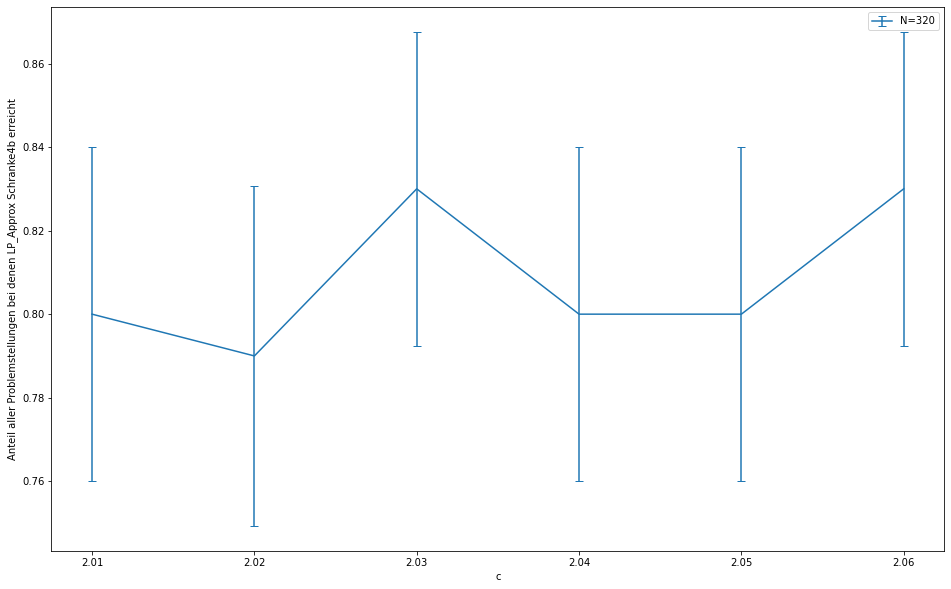

In [14]:
fig, ax = plt.subplots(figsize=(16,10))
alpha=1.1
alg='LP_Approx'

pcs1 = auswertung_ma.prepare_alg_vs_schranke_data({}, data_vor, alg, alpha)

for n in sorted(pcs1.keys()):
    
    ax.errorbar(pcs1[n].ids, pcs1[n].props, yerr=pcs1[n].std_dev, capsize=4, label=f'N={n}')
    
ax.legend()

ax.set_xlabel('c')
ax.set_ylabel('Anteil aller Problemstellungen bei denen LP_Approx Schranke4b erreicht')

# ax.set_xlim([0.615,.65])
# ax.set_ylim([0.86, 0.91])

# ax.set_xlim([0.55,.71])
# ax.set_ylim([0.84, 0.99])

# plt.savefig('pk_uebergang_lp.png')

[] [320]


Text(0, 0.5, 'Anteil aller Problemstellungen bei denen Greedy Schranke4b erreicht')

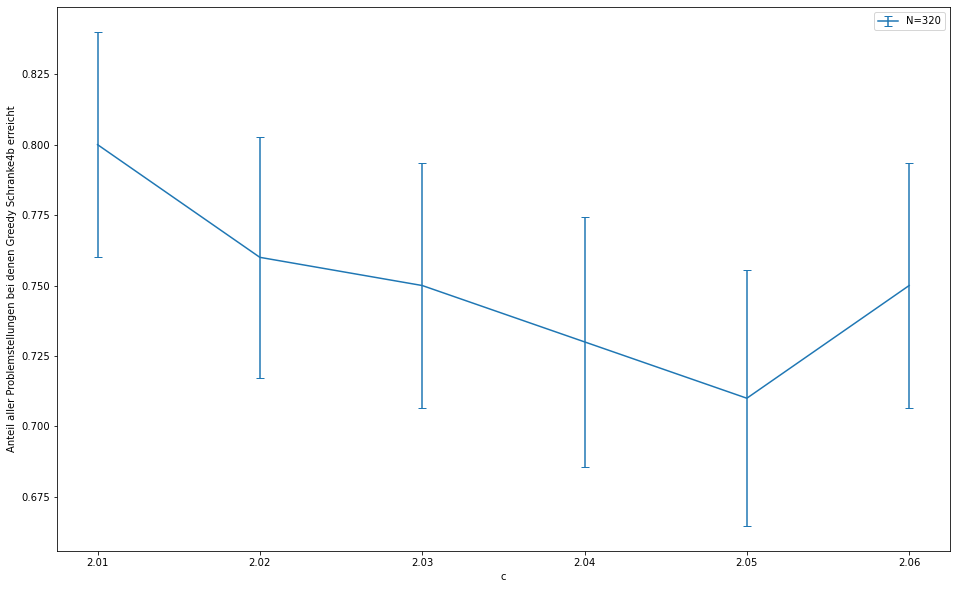

In [17]:
fig, ax = plt.subplots(figsize=(16,10))
alpha=1.1
alg='Greedy'

pcs1 = auswertung_ma.prepare_alg_vs_schranke_data({}, data_vor, alg, alpha)

for n in sorted(pcs1.keys()):
    
    ax.errorbar(pcs1[n].ids, pcs1[n].props, yerr=pcs1[n].std_dev, capsize=4, label=f'N={n}')
    
ax.legend()

ax.set_xlabel('c')
ax.set_ylabel('Anteil aller Problemstellungen bei denen Greedy Schranke4b erreicht')

# ax.set_xlim([0.49,.81])
# ax.set_ylim([0.8, 1.02])

# ax.set_xlim([0.62, 0.66])
# ax.set_ylim([0.5, .9])

# plt.savefig('pk_uebergang_lp.png')

In [34]:
n = 2000
auswertung_ma.calc_expected_edges_p(n, auswertung_ma.calc_p_to_c(n, 2)) / n

0.9995

In [37]:
n = 20
c = 20
auswertung_ma.calc_p_to_c(n, c)

1.0

# 1 Szenario

In [5]:
# lese die vorausgewerteten Daten ein
p1 = r'D:\Uni\Masterarbeit\Daten\Anteil\1_scenario\Vorauswertung'
data_vor1, lp_vor1 = auswertung_ma.read_vorauswertung(p1, id='c', id_stelle=1, read_lp=True)

In [6]:
data_vor1[80].calc_statistic_size()

,stat_size
ids,
2.0,20000
2.1,10000
2.2,10000
2.3,10000
2.4,10000
2.5,10000
2.6,10000
2.7,10000
2.8,10000


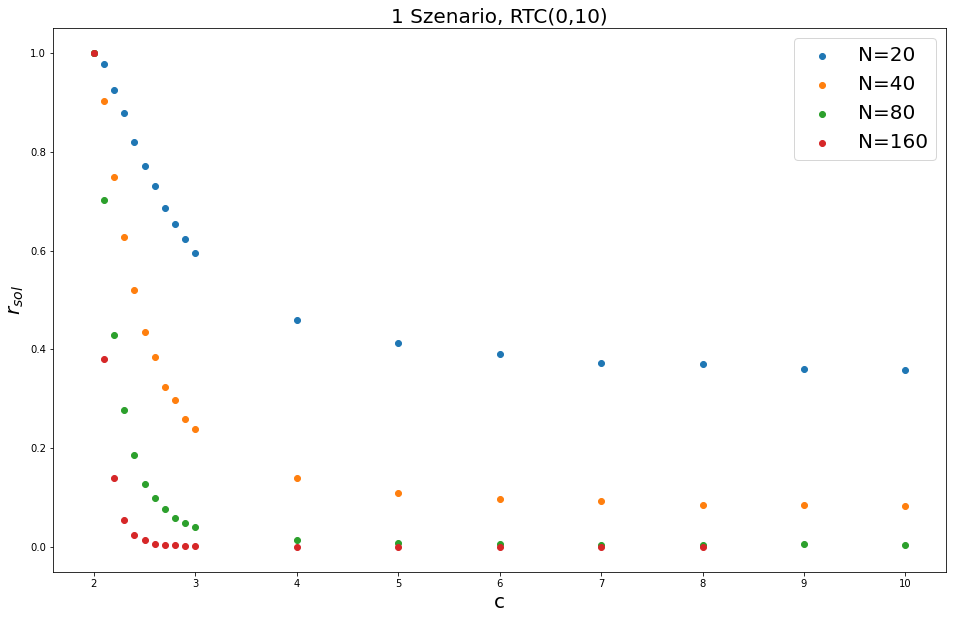

In [5]:
fig, ax = plt.subplots(figsize=(16,10))

for n in sorted(lp_vor1.keys()):

    ax.scatter(lp_vor1[n].index, lp_vor1[n]['Anteil_GGL'], label=f'N={n}')

ax.set_xlabel('c', fontsize=20)
ax.set_ylabel('$r_{sol}$', fontsize=20)
ax.set_title('1 Szenario, RTC(0,10)', fontsize=20)
ax.legend(fontsize=20)

Text(0, 0.5, 'Anteil aller Problemstellungen bei denen LP_Approx 1.02 $\\cdot$ Schranke4b unterbietet')

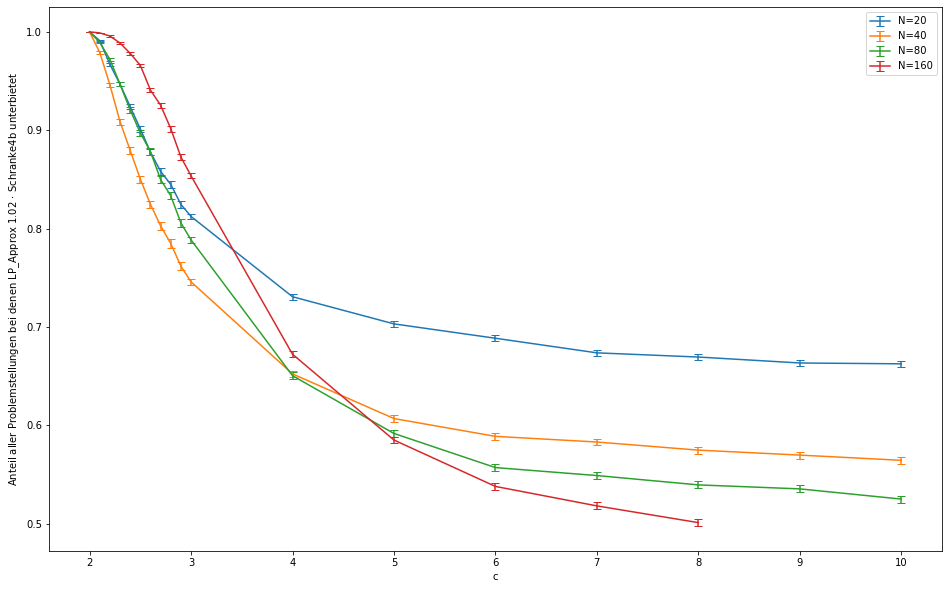

In [10]:
fig, ax = plt.subplots(figsize=(16,10))
alpha=1.02
alg='LP_Approx'

pcs1 = auswertung_ma.prepare_alg_vs_schranke_data({}, data_vor1, alg, alpha)

for n in sorted(pcs1.keys()):
    
    ax.errorbar(pcs1[n].ids, pcs1[n].props, yerr=pcs1[n].std_dev, capsize=4, label=f'N={n}')
    
ax.legend()

ax.set_xlabel('c')
ax.set_ylabel(f'Anteil aller Problemstellungen bei denen LP_Approx {alpha} $\cdot$ Schranke4b unterbietet')

# ax.set_xlim([0.615,.65])
# ax.set_ylim([0.86, 0.91])

# ax.set_xlim([0.55,.71])
# ax.set_ylim([0.84, 0.99])

# plt.savefig('pk_uebergang_lp.png')

Der LP_Approximationsalg wird besser, wenn das Problem groesser wird und wenn alpha gross genug gesetzt wird. Das kann aber an dem Alpha liegen

Text(0, 0.5, 'Anteil aller Problemstellungen bei denen Greedy 1.2 $\\cdot$ Schranke4b erreicht')

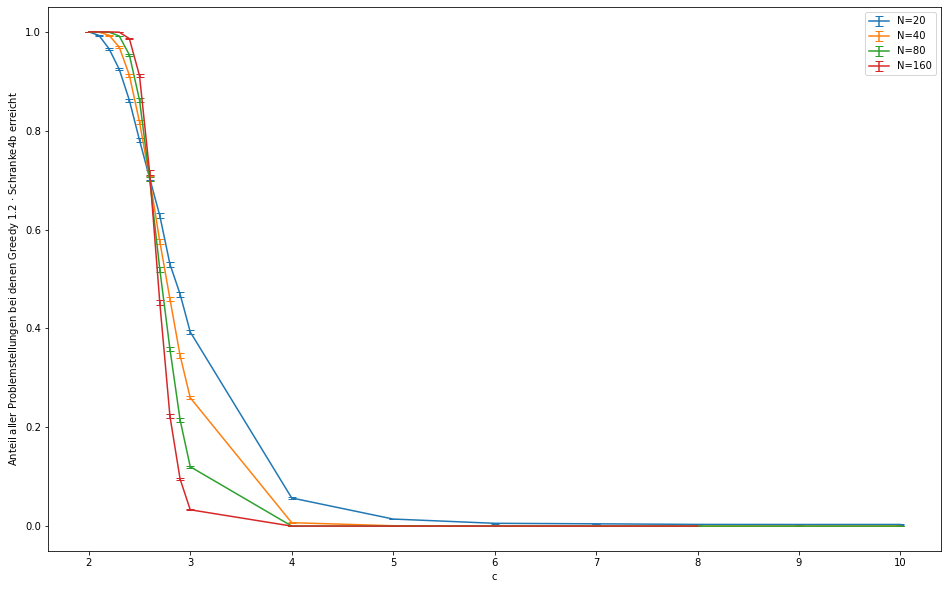

In [108]:
fig, ax = plt.subplots(figsize=(16,10))
alpha=1.2
alg='Greedy'

pcs1 = auswertung_ma.prepare_alg_vs_schranke_data({}, data_vor1, alg, alpha)

for n in sorted(pcs1.keys()):
    
    ax.errorbar(pcs1[n].ids, pcs1[n].props, yerr=pcs1[n].std_dev, capsize=4, label=f'N={n}')
    
ax.legend()

ax.set_xlabel('c')
ax.set_ylabel(f'Anteil aller Problemstellungen bei denen Greedy {alpha} $\cdot$ Schranke4b erreicht')

# ax.set_xlim([1.9,4.2])
# ax.set_ylim([0.8, 1.02])

# ax.set_xlim([0.62, 0.66])
# ax.set_ylim([0.5, .9])

# plt.savefig('pk_uebergang_lp.png')

(1.9, 3.1)

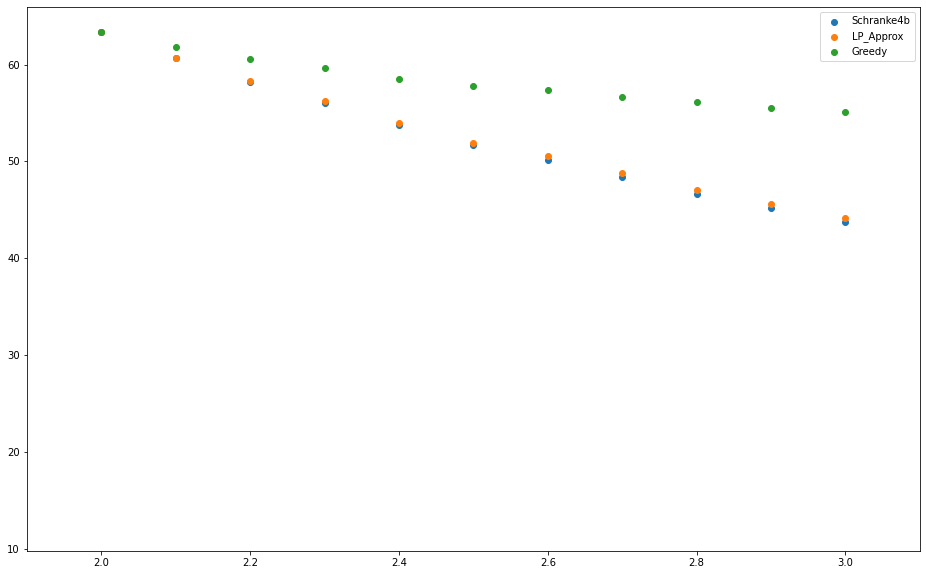

In [27]:
fig, ax = plt.subplots(figsize=(16, 10))

d20_alg_results = data_vor1[20].calc_mean_alg_results()
for alg in d20_alg_results.columns:
    ax.scatter(d20_alg_results.index, d20_alg_results[alg], label=alg)
ax.legend()
ax.set_xlim([1.9, 3.1])

(1.9, 3.1)

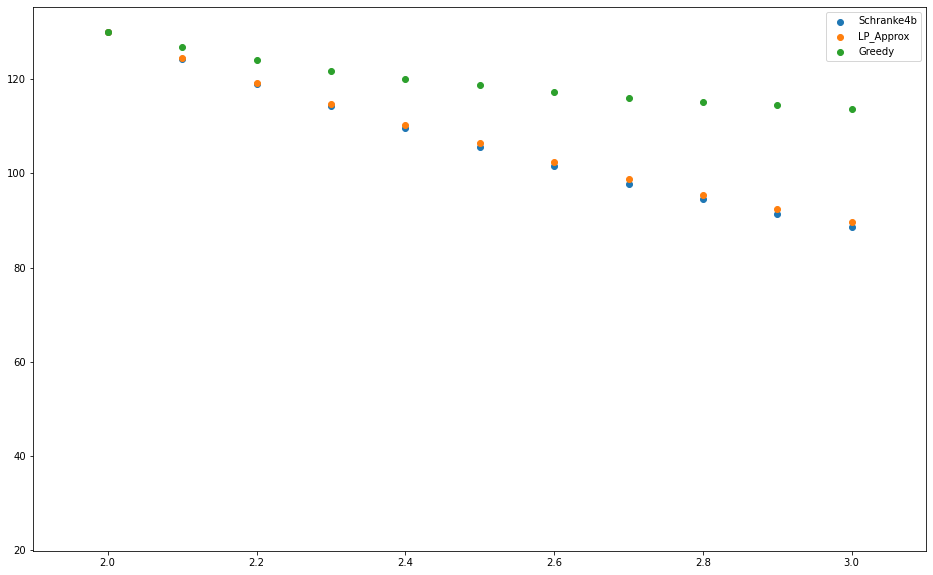

In [26]:
fig, ax = plt.subplots(figsize=(16, 10))

d40_alg_results = data_vor1[40].calc_mean_alg_results()
for alg in d40_alg_results.columns:
    ax.scatter(d40_alg_results.index, d40_alg_results[alg], label=alg)
ax.legend()
ax.set_xlim([1.9, 3.1])

(1.9, 3.1)

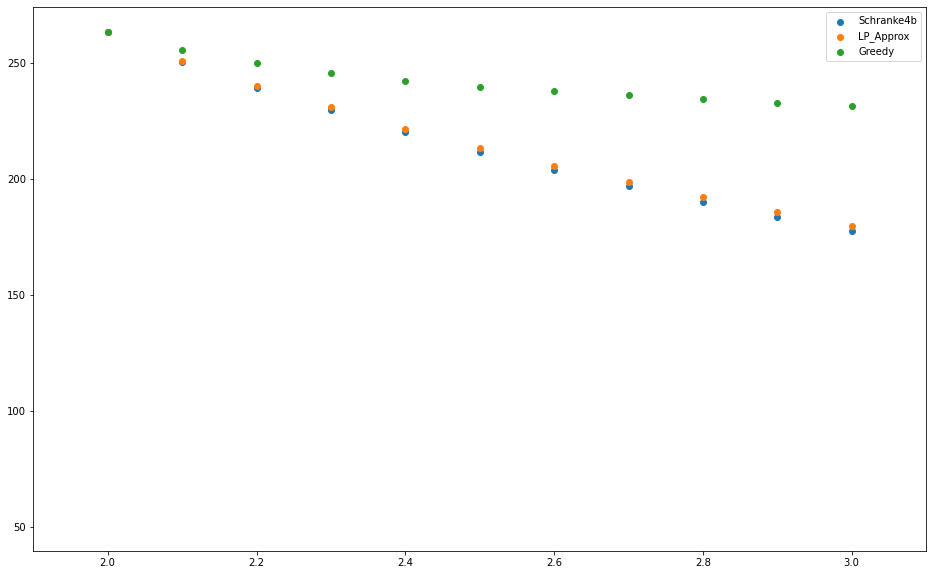

In [25]:
fig, ax = plt.subplots(figsize=(16, 10))

d80_alg_results = data_vor1[80].calc_mean_alg_results()
for alg in d80_alg_results.columns:
    ax.scatter(d80_alg_results.index, d80_alg_results[alg], label=alg)
ax.legend()
ax.set_xlim([1.9, 3.1])

(1.9, 3.1)

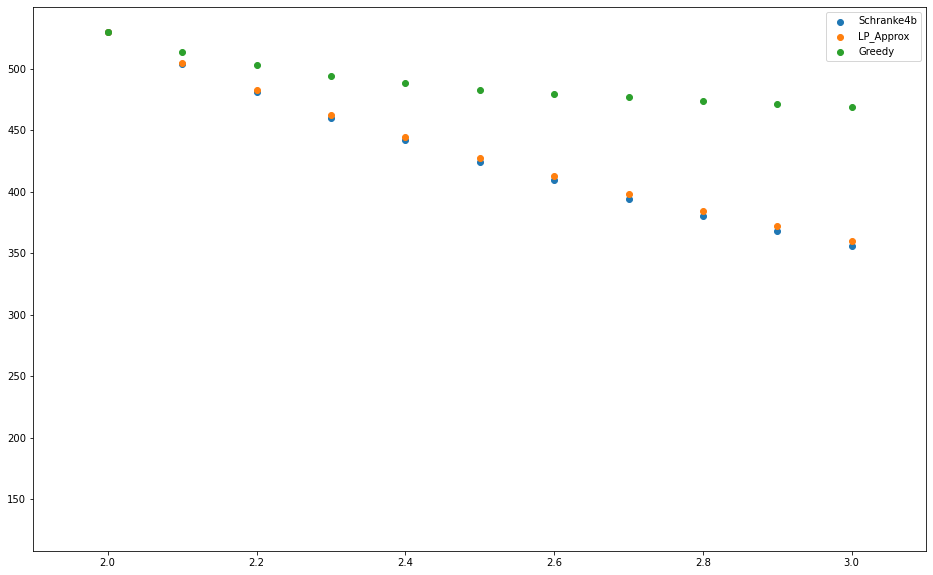

In [24]:
fig, ax = plt.subplots(figsize=(16, 10))

d160_alg_results = data_vor1[160].calc_mean_alg_results()
for alg in d160_alg_results.columns:
    ax.scatter(d160_alg_results.index, d160_alg_results[alg], label=alg)
ax.legend()
ax.set_xlim([1.9, 3.1])

In [34]:
d20_alg_results['Greedy'] / d20_alg_results['Schranke4b']

ids
2.0     1.000000
2.1     1.020137
2.2     1.041603
2.3     1.064340
2.4     1.088999
2.5     1.117836
2.6     1.143777
2.7     1.171653
2.8     1.204684
2.9     1.229867
3.0     1.261169
4.0     1.562227
5.0     1.790770
6.0     1.936545
7.0     2.027727
8.0     2.073553
9.0     2.102397
10.0    2.111390
dtype: float64

In [33]:
d160_alg_results['Greedy'] / d160_alg_results['Schranke4b']

ids
2.0    1.000000
2.1    1.020555
2.2    1.044950
2.3    1.073639
2.4    1.104471
2.5    1.137587
2.6    1.172103
2.7    1.208722
2.8    1.245021
2.9    1.279927
3.0    1.314970
4.0    1.601126
5.0    1.793232
6.0    1.916922
7.0    1.995907
8.0    2.045474
dtype: float64

In [64]:
data_vor1[20]

20
40
80
160


Text(0, 0.5, 'Verhältnis der Mittelwerte Greedy/Schranke4b')

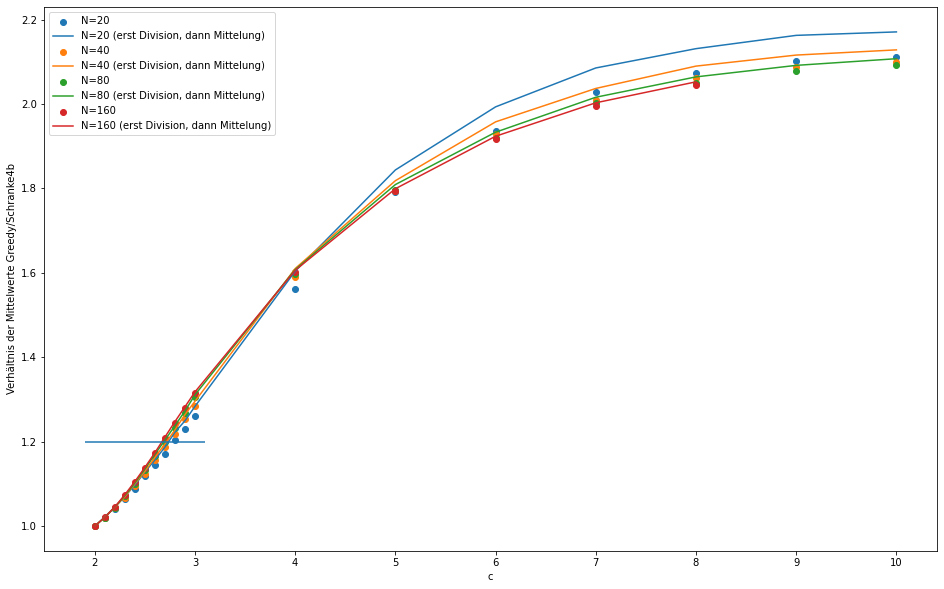

In [107]:
fig, ax = plt.subplots(figsize=(16,10))

l = [d20_alg_results, d40_alg_results, d80_alg_results, d160_alg_results]
labs = [20, 40, 80, 160]

for i in range(len(l)):
    s = l[i]['Greedy'] / l[i]['Schranke4b']
    ax.scatter(s.index, s, label=f'N={labs[i]}')
    
    print(labs[i])
    
    mean_v = [(data_vor1[labs[i]].raw_results[j]['Greedy'] / data_vor1[labs[i]].raw_results[j]['Schranke4b']).mean() for j in data_vor1[labs[i]].id_values]
    ax.plot(data_vor1[labs[i]].id_values, mean_v, label=f'N={labs[i]} (erst Division, dann Mittelung)')
    
ax.legend()
ax.hlines(1.2, 1.9, 3.1)
ax.set_xlabel('c')
ax.set_ylabel('Verhältnis der Mittelwerte Greedy/Schranke4b')
# ax.set_xlim((1.9,3.1))
# ax.set_ylim((0.99, 1.41))

Im Bereich des Schnittpunktes bei zB. alpha=1.2 gilt: Das Verhältnis der Mittelwerte von Greedy und Schranke4b ist für große N näher an dem alpha dran als für kleine N. Passt das mit dem Anteil an Problemstellungen zusammen, wo Greedy/Schranke4b <= alpha sein muss?

ACHTUNG: Hier gibt es ja auch einen Übergang!

Wenn ich erst teile und dann mittle, kommt fast das selbe raus.

In [92]:
print('Anteil aller Problemstellungen, wo Greedy für c=2.5 unter 1.2 * Schranke4b liegt:')
print('N=20: ', ((data_vor1[20].raw_results[2.5]['Greedy'] / data_vor1[20].raw_results[2.5]['Schranke4b']) < 1.2).sum() / 10000)
print('N=160: ', ((data_vor1[160].raw_results[2.5]['Greedy'] / data_vor1[160].raw_results[2.5]['Schranke4b']) < 1.2).sum() / 10000)
print()
print('Mittleres Verhältnis Greedy/Schranke4b')
print('N=20: ', (data_vor1[20].raw_results[2.5]['Greedy'] / data_vor1[20].raw_results[2.5]['Schranke4b']).mean())
print('N=160: ', (data_vor1[160].raw_results[2.5]['Greedy'] / data_vor1[160].raw_results[2.5]['Schranke4b']).mean())

Anteil aller Problemstellungen, wo Greedy für c=2.5 unter 1.2 * Schranke4b liegt:
N=20:  0.7808
N=160:  0.9114

Mittleres Verhältnis Greedy/Schranke4b
N=20:  1.128239855591513
N=160:  1.1390505950680867


Das heisst, es muss fuer c=20 extremere Werte geben oder? der mittelwert ist kleiner als fuer c=160, aber es muss ja mehr Problemstellungen geben, wo das Ergebnis vom Greedyalg ueber der Schranke drueber liegt

Histogramm time!

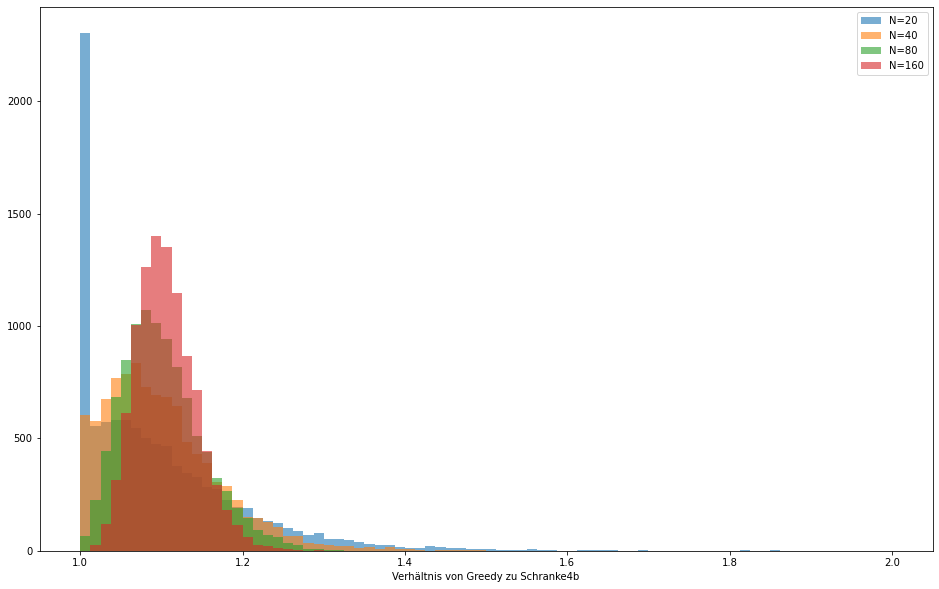

In [118]:
fig, ax = plt.subplots(figsize=(16, 10))
ax.hist(data_vor1[20].raw_results[2.4]['Greedy'] / data_vor1[20].raw_results[2.4]['Schranke4b'], bins=80, range=(1,2), label='N=20', alpha=.6)
ax.hist(data_vor1[40].raw_results[2.4]['Greedy'] / data_vor1[40].raw_results[2.4]['Schranke4b'], bins=80, range=(1,2), label='N=40', alpha=.6)
ax.hist(data_vor1[80].raw_results[2.4]['Greedy'] / data_vor1[80].raw_results[2.4]['Schranke4b'], bins=80, range=(1,2), label='N=80', alpha=.6)

ax.hist(data_vor1[160].raw_results[2.4]['Greedy'] / data_vor1[160].raw_results[2.4]['Schranke4b'], bins=80, range=(1,2),label='N=160', alpha=.6)
ax.set_xlabel("Verhältnis von Greedy zu Schranke4b")
# ax.set_xlim(0.99, 2.01)
ax.legend()

Ich erkenne, dass der Greedy alg für c=2.4 und N=20 häufig noch sehr nahe an der Schranke4b dran ist, aber dafür auch stärkere Abweichungen vorkommen. Also die Ergebnisse machen schon so Sinn. Im Mittel ist der Greedy-Alg für kleine N vllt sogar besser, aber für grosse N kann man sagen, dass links vom krit. Pkt (fast) alle Problemstellungen von Greedy so gelöst werden, dass sie nicht schlechter als 1.2 mal den Schrankenwert sind

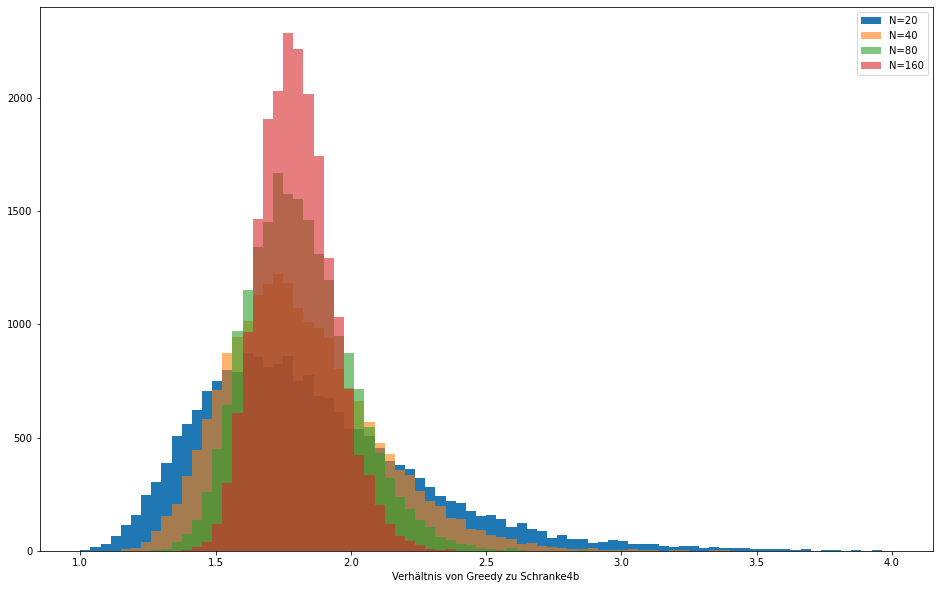

In [116]:
fig, ax = plt.subplots(figsize=(16, 10))
ax.hist(data_vor1[20].raw_results[5.]['Greedy'] / data_vor1[20].raw_results[5.]['Schranke4b'], bins=80, range=(1,4), label='N=20')
ax.hist(data_vor1[40].raw_results[5.]['Greedy'] / data_vor1[40].raw_results[5.]['Schranke4b'], bins=80, range=(1,4), label='N=40', alpha=.6)
ax.hist(data_vor1[80].raw_results[5.]['Greedy'] / data_vor1[80].raw_results[5.]['Schranke4b'], bins=80, range=(1,4), label='N=80', alpha=.6)

ax.hist(data_vor1[160].raw_results[5.]['Greedy'] / data_vor1[160].raw_results[5.]['Schranke4b'], bins=80, range=(1,4),label='N=160', alpha=.6)
ax.set_xlabel("Verhältnis von Greedy zu Schranke4b")
# ax.set_xlim(0.99, 2.01)
ax.legend()

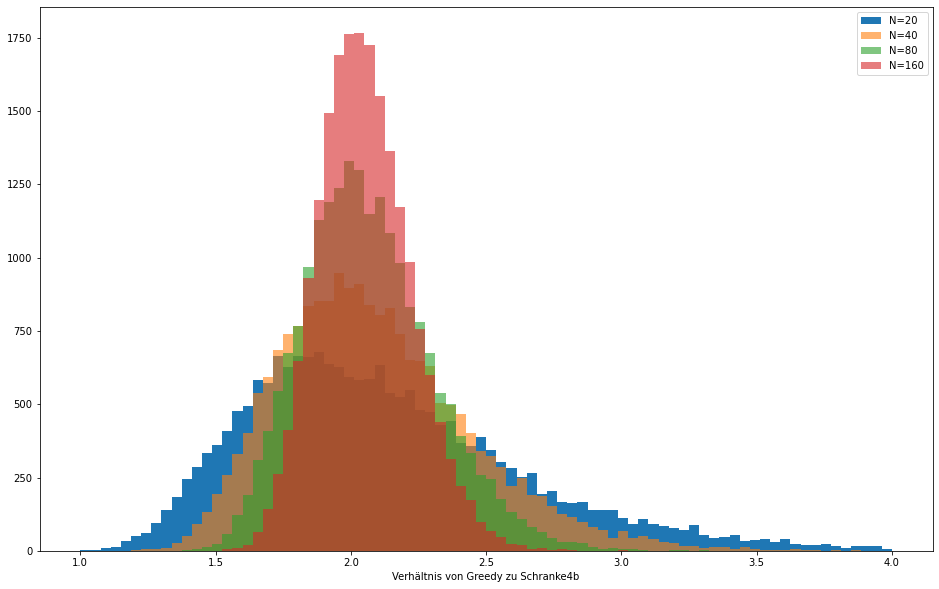

In [120]:
fig, ax = plt.subplots(figsize=(16, 10))
c = 8.0
ax.hist(data_vor1[20].raw_results[c]['Greedy'] / data_vor1[20].raw_results[c]['Schranke4b'], bins=80, range=(1,4), label='N=20')
ax.hist(data_vor1[40].raw_results[c]['Greedy'] / data_vor1[40].raw_results[c]['Schranke4b'], bins=80, range=(1,4), label='N=40', alpha=.6)
ax.hist(data_vor1[80].raw_results[c]['Greedy'] / data_vor1[80].raw_results[c]['Schranke4b'], bins=80, range=(1,4), label='N=80', alpha=.6)
ax.hist(data_vor1[160].raw_results[c]['Greedy'] / data_vor1[160].raw_results[c]['Schranke4b'], bins=80, range=(1,4),label='N=160', alpha=.6)
ax.set_xlabel("Verhältnis von Greedy zu Schranke4b")
# ax.set_xlim(0.99, 2.01)
ax.legend()

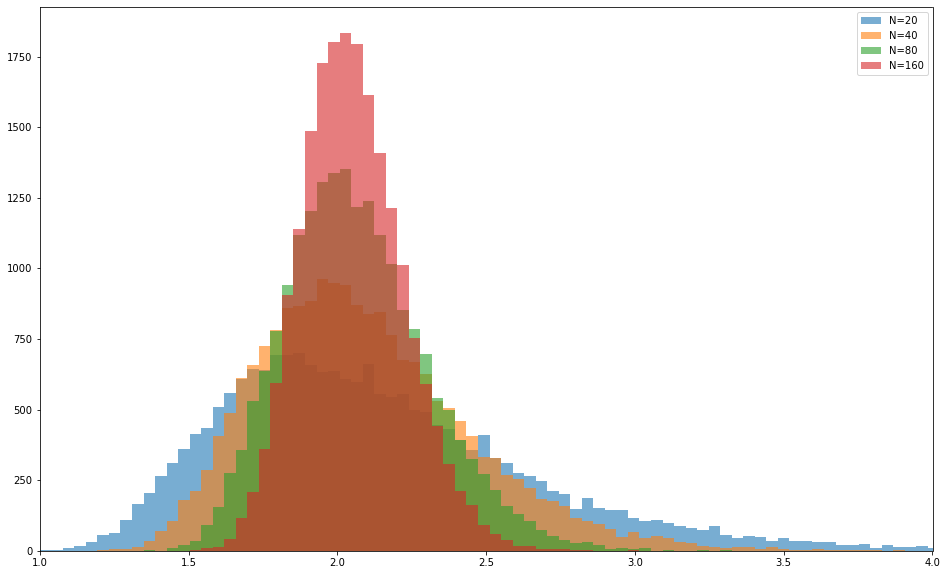

In [3]:
ns = [20, 40, 80, 160]
auswertung_ma.plot_hist_alg_vs_schranke([data_vor1[i] for i in ns], ns, 'Greedy', 8.)